In [1]:
import pickle
pickle_in=open("train_X.pickle",'rb')
train_X=pickle.load(pickle_in)
pickle_in.close()
pickle_in=open("train_Y.pickle",'rb')
train_Y=pickle.load(pickle_in)
pickle_in.close()
pickle_in=open("test_X.pickle",'rb')
test_X=pickle.load(pickle_in)
pickle_in.close()
pickle_in=open("test_Y.pickle",'rb')
test_Y=pickle.load(pickle_in)
pickle_in.close()

this is a Cat


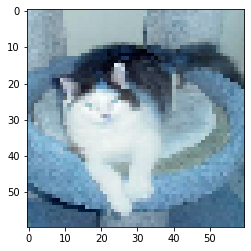

In [2]:
import matplotlib.pyplot as plt
import numpy as np
CATEGORIES=["Cat","Dog"]
plt.imshow(train_X[0])
print("this is a",CATEGORIES[train_Y[0]])

In [3]:
train_X=np.array(train_X)
train_Y=np.array(train_Y)
test_X=np.array(test_X)
test_Y=np.array(test_Y)
train_X_flatten=train_X.reshape(train_X.shape[0],-1).T
test_X_flatten=test_X.reshape(test_X.shape[0],-1).T

In [4]:
train_X_norm=train_X_flatten/255
test_X_norm=test_X_flatten/255

### ANN model

In [5]:
def layer_sizes(X, Y):
    n_x =  X.shape[0] # size of input layer
    n_h =  4 # size of hidden layer
    n_y =  1 # size of output layer
    return (n_x, n_h, n_y)

In [6]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) # In order to keep the results same for all the iterations
    
    W1 = np.random.randn(n_h,n_x)*0.01 # We can't initialise it with zero as it would mimic perceptron i.e linear classifier
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [7]:
def forward_propagation(X, parameters):
    # parameters is a dictionary obtained from function initialize_parameters(...)
    W1 = parameters["W1"] 
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = 1/(1+np.exp(-Z2))
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [8]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1] # number of example
    # Compute the cross-entropy cost
    logprobs = np.log(A2)*Y+(1-Y)*np.log(1-A2)
    cost = -1/m*np.sum(logprobs)
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
    assert(isinstance(cost, float))
    return cost

In [9]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    # Retrieve A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    # These all are differentiation of loss function wrt to activation, weight and bias. 
    dZ2 = A2-Y
    dW2 = 1/m*np.dot(dZ2,A1.T)
    db2 = 1/m*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = 1/m*np.dot(dZ1,X.T)
    db1 = 1/m*np.sum(dZ1,axis=1,keepdims=True) 
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [10]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    a=learning_rate # Learning Rate
    #Updating the parameters
    W1 = W1-a*dW1
    b1 = b1-a*db1
    W2 = W2-a*dW2
    b2 = b2-a*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [11]:
def nn_model(X, Y, n_h, learning_rate=0.1, num_iterations = 10000, print_cost=False):
    np.random.seed(3) # To keep the same ouput for repeated iterations
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    parameters = initialize_parameters(n_x, n_h, n_y)
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)       
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [12]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2>0.5)
    return predictions

In [13]:
parameters = nn_model(train_X_norm, train_Y.reshape(80,1).T, 4, print_cost=True)

Cost after iteration 0: 0.693097
Cost after iteration 1000: 0.285751
Cost after iteration 2000: 0.020239
Cost after iteration 3000: 0.006741
Cost after iteration 4000: 0.004035
Cost after iteration 5000: 0.002878
Cost after iteration 6000: 0.002236
Cost after iteration 7000: 0.001828
Cost after iteration 8000: 0.001546
Cost after iteration 9000: 0.001339


In [14]:
predictions=predict(parameters, train_X_norm)

In [15]:
Y=train_Y.reshape(80,1).T
print ('Train Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Train Accuracy: 100%


In [16]:
predictions=predict(parameters, test_X_norm)

In [17]:
Y=test_Y.reshape(4,1).T
print ('Train Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Train Accuracy: 100%


# We have acheived 100% accuracy in this model too without doing many changes in hyperparameters.  